#  Домашнее задание 2 (Паровые и газовые турбины)

# Выполнил Салабай В.Р. (ФПэ-01-22)

In [1]:
#Загружаем библиотеки
import matplotlib.pyplot as plt 
import numpy as np  
import iapws  
from iapws import IAPWS97 as gas

""""Условие задачи
Построить график зависимости термического КПД паротурбинного цикла без промежуточного перегрева пара при следующих 
параметрах пара: 𝑃0 = 5, 10, 15, 20 МПа. Для каждого значения взять следующие значения температуры 
𝑡0 = 300, 350, 400, 450, 500 градусов Цельсия, 𝑃𝑘 = 5 кПа. Принять давление за последней ступенью паровой турбины 𝑃2 = 𝑃𝑘.
Термический КПД цикла оценивать без учета подогрева воды в питательном насосе и регенеративной системе."""

In [2]:
#СИ  
MPa = 10**6 
kPa = 10**3 
unit_KPa = kPa / MPa 
unit_MPa = 1 / MPa 
gradus_Celsiya = 1 

In [3]:
#Создаем массив давления и задаем температуру
p0 = 5 * MPa 
t0 = 450 * gradus_Celsiya 
Pk = np.array([5, 10, 15, 20, 50]) 

In [4]:
#Используя формулы, проводим расчеты
KPD = [] 
for Pk1 in Pk: 
    point_0 = gas (T = (t0 + 273.15), P = p0 * unit_MPa, ) 
    point_condensator_vhod = gas (P = Pk1 * unit_KPa, s = point_0.s) 
    point_nasos_vihod = gas (P = (Pk1 * unit_KPa), x = 0) 
    poleznaya_energiya = point_0.h - point_condensator_vhod.h 
    polnaya_energiya = point_0.h - point_nasos_vihod.h 
    KPD_1 = (poleznaya_energiya / polnaya_energiya)*100 
    KPD.append(KPD_1) 
    
    

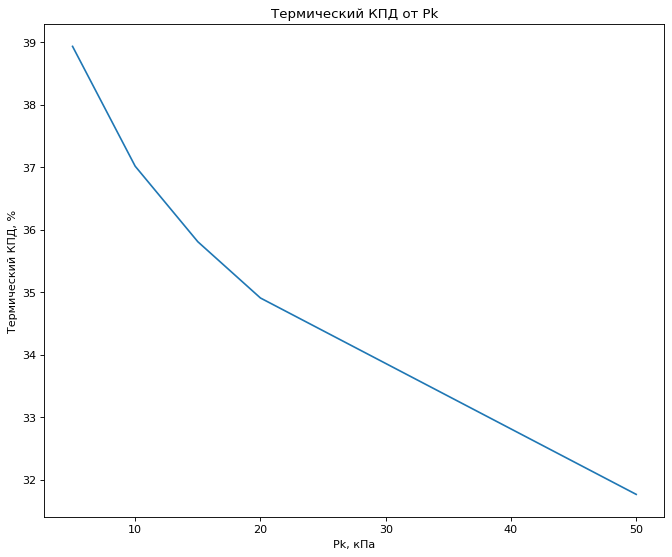

In [5]:
#Строим график зависимости 
plt.figure(figsize=(10, 8), dpi=80)
plt.title("Термический КПД от Pk") 
plt.ylabel("Термический КПД, %") 
plt.xlabel("Pk, кПа") 


plt.plot(Pk[:5], KPD[:5])
plt.show()